In [1]:
import pandas as pd
import numpy as np
from help import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
toys = pd.read_csv('amazon_co-ecommerce_sample.csv')

In [3]:
toys.describe()

,number_of_answered_questions
count,9235.000000
mean,1.834976
std,2.517268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,39.000000


In [4]:
toys.describe(include = ['O'])

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
count,10000,10000,9993,8565,7500,9982,9982,9310,8938,9349,9942,9349,6935,914,9979,6918
unique,10000,9964,2651,2625,89,194,19,255,8755,8514,9939,8514,6749,910,9901,6581
top,85cb76787ca623045ee05e620d2cff53,Polyhedral Dice,LEGO,£9.99,2 new,1,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Are these the newest cards out? // HelloYes th...,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,1,3,171,189,1337,4315,5140,880,60,113,2,113,38,2,5,27


In [5]:
toys['manufacturer'].value_counts().iloc[0:20]

LEGO                             171
Disney                           167
Oxford Diecast                   156
Playmobil                        147
Star Wars                        120
Mattel                           114
Hasbro                           110
The Puppet Company               109
MyTinyWorld                       93
Corgi                             90
Hornby                            87
Scalextric                        76
Pokémon                           69
Schleich                          68
Amscan                            65
Every-occasion-party-supplies     62
Melissa & Doug                    59
FunKo                             59
Papo                              58
Tamiya                            57
Name: manufacturer, dtype: int64

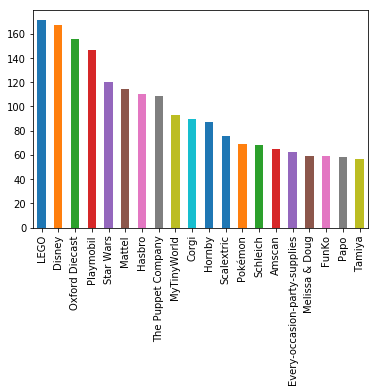

In [6]:
toys['manufacturer'].value_counts().iloc[0:20].plot.bar()

In [7]:
toys['price'].head(10)

0      £3.42
1     £16.99
2      £9.99
3     £39.99
4     £32.19
5      £6.99
6     £24.99
7     £69.93
8    £235.58
9        NaN
Name: price, dtype: object

In [8]:
toys['price'].str.replace(r'[^\d.]','').head(10)

0      3.42
1     16.99
2      9.99
3     39.99
4     32.19
5      6.99
6     24.99
7     69.93
8    235.58
9       NaN
Name: price, dtype: object

In [9]:
toys['price'] = toys['price'].str.replace(r'[^\d.]','')

In [10]:
toys['price'].loc[toys['price'].str.len() == 13]

3193    12.6016268.00
Name: price, dtype: object

In [11]:
toys['price'] = toys['price'].str.replace(r'[^\d.]','').str.split('.').str[0]

In [12]:
toys['price'].loc[toys['price'].str.len() == 13]

Series([], Name: price, dtype: object)

In [13]:
toys['price'] = toys['price'].str.replace(r'[^\d.]','').str.split('.').str[0].astype('float')

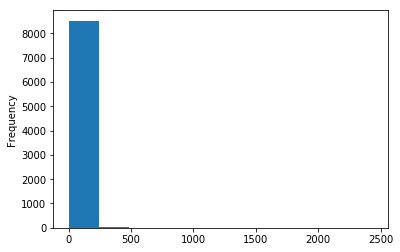

In [14]:
toys['price'].plot.hist()

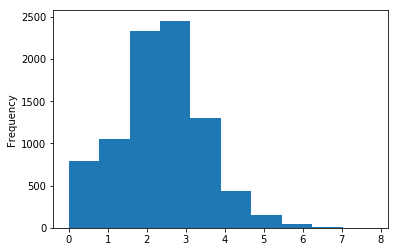

In [15]:
np.log1p(toys['price']).plot.hist()

In [16]:
toys['number_available_in_stock'].str.split(r'[\s]').str[-1].value_counts()

new            7324
used            161
collectible      13
refurbished       2
Name: number_available_in_stock, dtype: int64

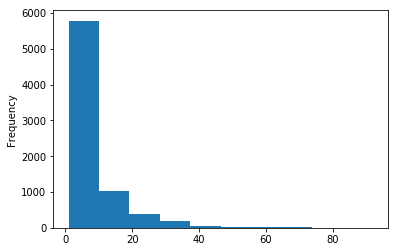

In [17]:
toys['number_available_in_stock'] = toys['number_available_in_stock'].str.split(r'[\s]').str[0].astype('float')
toys['number_available_in_stock'].plot.hist()

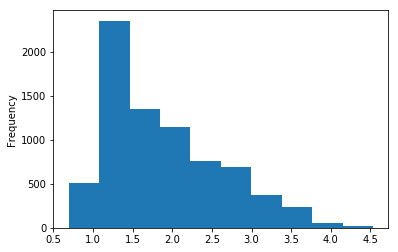

In [18]:
np.log1p(toys['number_available_in_stock']).plot.hist()

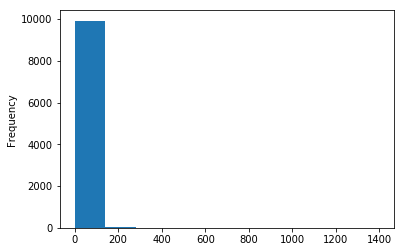

In [19]:
toys['number_of_reviews'] = toys['number_of_reviews'].str.replace(',','').astype('float')
toys['number_of_reviews'].plot.hist()

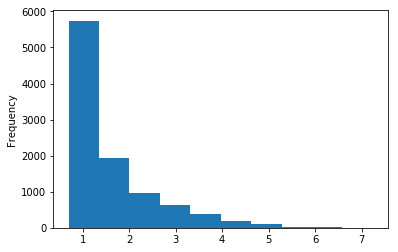

In [20]:
np.log1p(toys['number_of_reviews']).plot.hist()

In [21]:
toys['average_review_rating'].sample(10)

7759    4.5 out of 5 stars
5767    5.0 out of 5 stars
8460    5.0 out of 5 stars
5359    5.0 out of 5 stars
5361    4.3 out of 5 stars
7740    4.2 out of 5 stars
9006    4.0 out of 5 stars
8569    5.0 out of 5 stars
9505    5.0 out of 5 stars
778     5.0 out of 5 stars
Name: average_review_rating, dtype: object

In [22]:
toys['average_review_rating'] = toys['average_review_rating'].str.split(' ').str[0].astype('float') / toys['average_review_rating'].str.split(' ').str[3].astype('float')

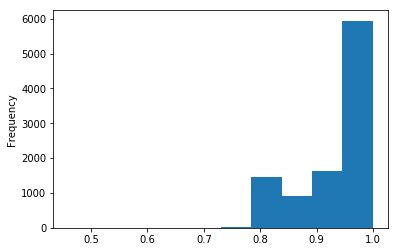

In [23]:
toys['average_review_rating'].plot.hist()

In [24]:
toys['amazon_category_and_sub_category'].sample(10)

9386                          Games > Trivia & Quiz Games
5472                                        Games > Chess
5724    Hobbies > Model Trains & Railway Sets > Rail V...
508                             Games > Dice & Dice Games
2950              Party Supplies > Decorations > Balloons
5454                                        Games > Chess
8231                  Characters & Brands > Disney > Toys
5403                                   Games > Card Games
9736    Arts & Crafts > Children's Craft Kits > Bead A...
3007              Party Supplies > Decorations > Balloons
Name: amazon_category_and_sub_category, dtype: object

In [25]:
toys['amazon_category_and_sub_category'].str.split(' > ').head(10)

0    [Hobbies, Model Trains & Railway Sets, Rail Ve...
1    [Hobbies, Model Trains & Railway Sets, Rail Ve...
2    [Hobbies, Model Trains & Railway Sets, Rail Ve...
3    [Hobbies, Model Trains & Railway Sets, Rail Ve...
4    [Hobbies, Model Trains & Railway Sets, Rail Ve...
5    [Hobbies, Model Trains & Railway Sets, Lightin...
6    [Hobbies, Model Trains & Railway Sets, Rail Ve...
7    [Hobbies, Model Trains & Railway Sets, Rail Ve...
8    [Hobbies, Model Trains & Railway Sets, Rail Ve...
9    [Hobbies, Model Trains & Railway Sets, Rail Ve...
Name: amazon_category_and_sub_category, dtype: object

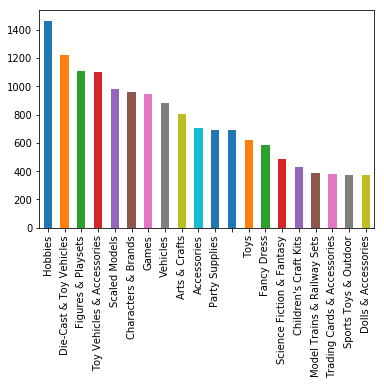

In [26]:
from itertools import chain
from collections import Counter

counts = pd.Series(dict(Counter(chain.from_iterable(toys['amazon_category_and_sub_category'].fillna('').str.split(' > ').values))))
counts = counts.sort_values(ascending = False)
counts.iloc[0:20].plot.bar()

In [46]:
toys['description'] = toys['description'].fillna('')

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

counter = TfidfVectorizer(stop_words = 'english')

counter.fit(toys['description'])

product_description = counter.transform(toys['description'])

In [52]:
product_description

<10000x30500 sparse matrix of type '<class 'numpy.float64'>'
	with 316256 stored elements in Compressed Sparse Row format>

In [88]:
from sklearn.decomposition import LatentDirichletAllocation

topics = LatentDirichletAllocation(n_components = 20)

topics.fit(product_description)

topics_lda = topics.transform(product_description)

print(topics_lda[0:5])

C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


[[0.0169058  0.0169058  0.0169058  0.0169058  0.12653971 0.0169058
  0.0169058  0.0169058  0.0169058  0.0169058  0.0169058  0.0169058
  0.0169058  0.0169058  0.0169058  0.0169058  0.0169058  0.56915593
  0.0169058  0.0169058 ]
 [0.01013908 0.01013908 0.01013908 0.01013908 0.01013908 0.01013908
  0.01013908 0.22129008 0.01013908 0.01013908 0.01013908 0.01013908
  0.01013908 0.01013908 0.01013908 0.01013908 0.01013908 0.59620639
  0.01013908 0.01013908]
 [0.00798642 0.00798642 0.00798642 0.00798642 0.00798642 0.00798642
  0.00798642 0.00798642 0.00798642 0.00798642 0.00798642 0.00798642
  0.00798642 0.00798642 0.00798642 0.00798642 0.00798642 0.84825807
  0.00798642 0.00798642]
 [0.01277472 0.01277472 0.01277472 0.01277472 0.53455413 0.01277472
  0.01277472 0.01277472 0.01277472 0.01277472 0.01277472 0.2355009
  0.01277472 0.01277472 0.01277472 0.01277472 0.01277472 0.01277472
  0.01277472 0.01277472]
 [0.00781796 0.00781796 0.00781796 0.00781796 0.18360721 0.00781796
  0.00781796 0.0078

In [89]:
topics_lda.sum(0)

array([ 141.65124571,  127.84714886,  135.70875223,  156.33112097,
       1234.78286705,  164.2677334 ,  131.41084172,  133.36646411,
        134.72451466,  129.62796177,  146.04857567,  138.60209765,
        471.4009927 ,  169.72234805,  186.71429232,  156.83649869,
        145.53299442, 5802.62627994,  135.03922166,  157.75804844])

In [93]:
topics_lda = topics_lda / np.matrix(topics_lda.sum(1)+np.finfo(float).eps).T

In [94]:
topics_lda.sum(1)[0:10]

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [91]:
tfidf_feature_names = counter.get_feature_names()

In [83]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [96]:
print_top_words(topics, tfidf_feature_names, 10)

Topic #0: chuggington teeth trainees plantoys fear warnings flamingo brewster daimler koko
Topic #1: arranged castanet marabu backrest wooded duncan kentrosaurus lounger swimways reclining
Topic #2: circle gruffalo radius curve pug h150mm h25cm julia deg su
Topic #3: trackmaster monchhichi maistoscale ref cast tangle 18die blackmanufacturer tangles 12die
Topic #4: scale model combined items models car 00 following diecast 50
Topic #5: ty beanie beyblade baby hulk spartan clown plants zombies hq
Topic #6: brainbox babies fractions compass 1in reversible collects architecture joggle 20013
Topic #7: 104pc stall critters stalls jp si buffers subway exchange reproduce
Topic #8: simon bullyland copper 10pcs h200mm bulb mug h20cm 27mm asterix
Topic #9: afv haul caboose spencer corriere entro spedito espresso ricezione ore
Topic #10: 9ft oliver 1929 h140mm firefly goggles moustaches southern donaldson axel
Topic #11: steam locomotive dcc decoder 01978 661046 cladding loco dapol services
Topic 